# Albumentations

Albumentations is a Python library for image augmentation. Image augmentation is used in deep learning and computer vision tasks to increase the quality of trained models. The purpose of image augmentation is to create new training samples from the existing data.

Here is an example of how you can apply some augmentations from Albumentations to create new images from the original one:

![image](https://camo.githubusercontent.com/3bb6e4bb500d96ad7bb4e4047af22a63ddf3242a894adf55ebffd3e184e4d113/68747470733a2f2f686162726173746f726167652e6f72672f776562742f62642f6e652f72762f62646e6572763563746b75646d73617a6e687734637273646669772e6a706567)

source: https://github.com/albumentations-team/albumentations

You can install it via 

`pip install -U albumentations`


In [1]:
# !pip install -U albumentations

     |████████████████████████████████| 72 kB 1.6 MB/s eta 0:00:011
     |████████████████████████████████| 948 kB 11.4 MB/s eta 0:00:01
     |████████████████████████████████| 12.9 MB 1.4 MB/s eta 0:00:01
     |████████████████████████████████| 40.3 MB 2.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 2.7 MB/s eta 0:00:01
     |████████████████████████████████| 3.3 MB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 40.3 MB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 1.6 MB/s eta 0:00:01
     |████████████████████████████████| 160 kB 474 kB/s eta 0:00:01
     |████████████████████████████████| 4.3 MB 686 kB/s eta 0:00:01


### Example with Luca's cat:

In [102]:
import matplotlib.pyplot as plt
import numpy as np
def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax



Text(0.5, 1.0, 'Original')

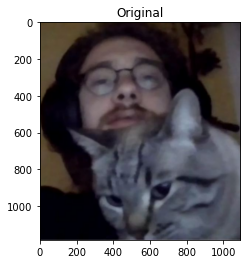

In [163]:
import albumentations as A
import cv2
import torch
from torchvision import datasets, transforms
from albumentations.pytorch import ToTensorV2


# Declare an augmentation pipeline
transform = A.Compose([
    A.RandomCrop(width=512, height=512),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.8),
    A.Posterize(num_bits=4, always_apply=True),
    A.Solarize (threshold=100, always_apply=True),
    A.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)),
    ToTensorV2()
])

# Read an image with OpenCV and convert it to the RGB colorspace
image = cv2.imread("../imgs/lucascat.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.title("Original")


<AxesSubplot:>

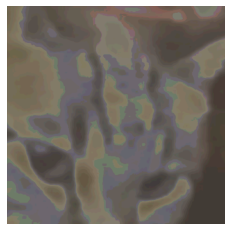

In [172]:
# Augment an image
transformed = transform(image=image)
transformed_image = transformed["image"]


imshow(transformed_image, title="Augmented")